# Fish or no Fish model with testingcode.

Run on google colab.
- Batch 4
- Ephocs 40
- yolov5m

In [2]:
from google.colab import files
import os

In [3]:
%%bash
git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [4]:
%%bash
pip install -r yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00


In [5]:
os.mkdir('train')


In [6]:
os.chdir('/content/yolov5/data')
uploaded = files.upload()

Saving my_YAML_file.yaml to my_YAML_file.yaml


In [7]:
os.chdir('/content/train')
uploaded = files.upload()

Saving Bacterial_Red disease_01.jpeg to Bacterial_Red disease_01.jpeg
Saving Bacterial_Red disease_01.txt to Bacterial_Red disease_01.txt
Saving Bacterial_Red disease_02.jpg to Bacterial_Red disease_02.jpg
Saving Bacterial_Red disease_02.txt to Bacterial_Red disease_02.txt
Saving Bacterial_Red disease_06.jpg to Bacterial_Red disease_06.jpg
Saving Bacterial_Red disease_06.txt to Bacterial_Red disease_06.txt
Saving Bacterial_Red disease_07.jpg to Bacterial_Red disease_07.jpg
Saving Bacterial_Red disease_07.txt to Bacterial_Red disease_07.txt
Saving Bacterial_Red disease_09.jpeg to Bacterial_Red disease_09.jpeg
Saving Bacterial_Red disease_09.txt to Bacterial_Red disease_09.txt
Saving Bacterial_Red disease_10.jpeg to Bacterial_Red disease_10.jpeg
Saving Bacterial_Red disease_10.txt to Bacterial_Red disease_10.txt
Saving Bacterial_Red disease_11.jpg to Bacterial_Red disease_11.jpg
Saving Bacterial_Red disease_11.txt to Bacterial_Red disease_11.txt
Saving Bacterial_Red disease_13.png to Bac

In [44]:
%%bash
cd /content/yolov5
python train.py --img 640 --batch 4 --epochs 40 --data data/my_YAML_file.yaml --weights yolov5m.pt

2024-02-05 11:50:50.150891: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-05 11:50:50.150945: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-05 11:50:50.152381: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=data/my_YAML_file.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=4, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=

In [ ]:
files.download('/content/yolov5/runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
from PIL import Image
import torch
from IPython.display import display
from google.colab import files

model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-2-5 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [41]:
uploaded = files.upload()

Saving cat.jpg to cat (1).jpg
Saving fish.jpg to fish (1).jpg
Saving fish_2.jpg to fish_2 (1).jpg
Saving water.jpg to water (1).jpg


In [42]:
image_path = next(iter(uploaded))

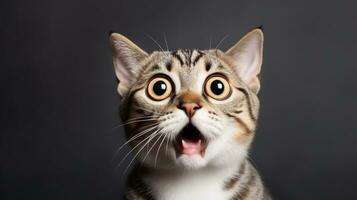

None

Predictions for cat (1).jpg:
tensor([], device='cuda:0', size=(0, 6))


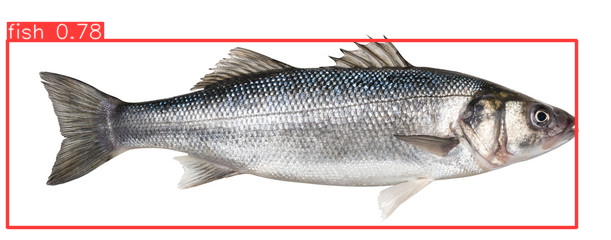

None

Predictions for fish (1).jpg:
tensor([[  7.05696,  40.42120, 576.43134, 227.86363,   0.78324,   0.00000]], device='cuda:0')


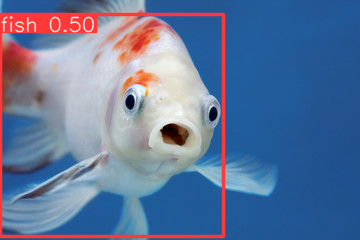

None

Predictions for fish_2 (1).jpg:
tensor([[  0.00000,  14.71295, 223.91551, 236.12993,   0.49976,   0.00000]], device='cuda:0')


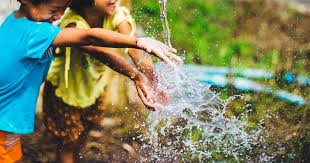

None

Predictions for water (1).jpg:
tensor([], device='cuda:0', size=(0, 6))


In [43]:
for image_name in uploaded.keys():
    input_image = Image.open(image_name)

    results = model(input_image)

    display(results.show())

    print(f"Predictions for {image_name}:")
    print(results.pred[0])